# Create Northern boundary condition for Pb (in Canada Basin)

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import csv
import stations
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [103]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#### Extended domain:

In [2]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [3]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [4]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

In [5]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

### Charters 2012 thesis data; sampled in 2009

Manuel says to be sceptical. Results of Pb determinations in the Canada Basin. Depth is in metres (m), [Pb] is in pmol/kg. [Pb] separated by commas are replicates from the same subsampled container.

In [6]:
station_names = ['L1', 'L1.1', 'L1.5', 'L2', 'L3', 'S4']
station_lats = [71+(6.9/60), 72+(30.6/60), 73+(19.2/60), 74+(23.6/60), 75+(16.8/60), 71+(11/60)]
station_lons = [139+(19.9/60), 136+(35.5/60), 139+(23.4/60), 136+(9.6/60), 137+(33.6/60), 132+(56.6/60)]
station_lons = [-1*i for i in station_lons]

L1_depth = [8, 15, 40, 90, 160, 250, 400, 599, 800, 1100, 1400, 1750]
L1_Pb = [29.7, 40.6, 14.0, 54.1, 20.1, 18.8, 32.7, (21.9+22.5)/2, 4.6, 19.6, 18.1, 10.9]
L11_depth = [8, 40, 75, 111, 170, 270, 425, 600, 1000, 1500, 2000, 2400]
L11_Pb = [12.7, 7.8, 5.9, 6.0, 1.8, 10.3, 23.4, 7.7, 8.4, 3.2, 10.5, (7+7+8.4)/3]
L15_depth = [10, 19, 40, 90, 140, 280, 380, 450, 600, 800, 1001]
L15_Pb = [31.7, 34.0, 20.4, 41.1, 19.3, 29.7, 27.6, (7.7+9.0)/2, 37.8, 35.0, 18.3]
L2_depth = [8, 25, 55, 120, 180, 271, 360, 421, 501, 648, 800, 1100, 1300, 1500, 1700, 1900, 2100, 2300, \
           2501, 2701, 2950] # removed the one extreme datapoint
L2_Pb = [9.8, 13.4, 5.4, 14.3, 9.6, 11.3, (13.8+14.4)/2, 7.7, 4.2, 16.8, 13.4, 8.6, 23.7, 35.5, \
         41.7, 25.6, (66.6+67.6+67.0)/3, 3.8, 36.4, 11.2, 14.4]
L3_depth = [10, 32, 55, 140, 180, 260, 349, 440, 600, 801, 1000, 1201]
L3_Pb = [15.0, 30.6, 8.1, 22.5, (8.9+7.8+8.3)/3, 8.3, 13.2, 10.0, 8.8, 15.3, 20.6, 20.1]
S4_depth = [7, 17, 50, 90, 150, 240]
S4_Pb = [16.1, 12.6, 8.5, 16.6, 3.8, 7.4]

Load Manuel's Canada Basin data:

In [7]:
CB1 = stations.CB1()
CB2 = stations.CB2()
CB3 = stations.CB3()
CB4 = stations.CB4()

In [8]:
man_names = ['CB2', 'CB3', 'CB4']
man_lons = [CB2.lon, CB3.lon, CB4.lon]
man_lats = [CB2.lat, CB3.lat, CB4.lat]
CB2_depth = CB2.depth
CB2_Pb = CB2.dPb
CB3_depth = CB3.depth
CB3_Pb = CB3.dPb
CB4_depth = CB4.depth
CB4_Pb = CB4.dPb

#### Plot Cruise data:

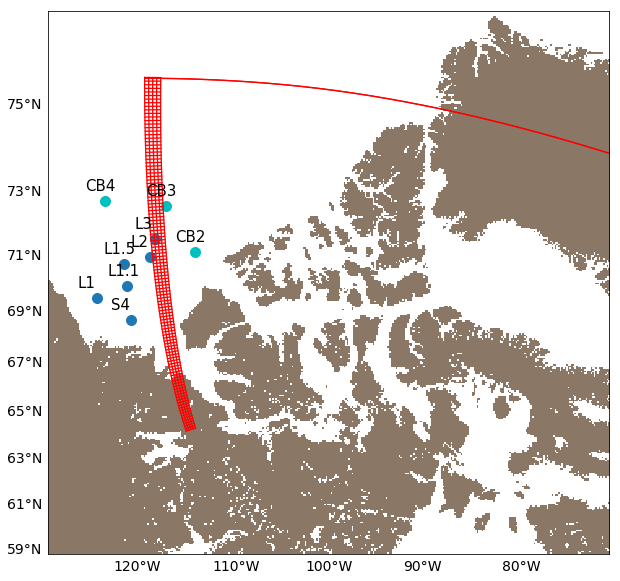

In [14]:
fig, ax1 = plt.subplots(figsize=(12,10))

proj2 = Basemap(projection='stere',lat_0 = 76, lon_0 = -100, resolution='i', width=3.2e6, height=3.1e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#ffffff", resolution = 'h')

x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)
x=x_mesh
y=y_mesh

# plot station locations:
x_data, y_data = proj2(station_lons, station_lats)
proj2.plot(x_data, y_data, '.', markersize=20)
for i, (X, Y) in enumerate(zip(x_data, y_data)):
    ax1.annotate(station_names[i], (X,Y), xytext=(-20,10), textcoords='offset points', fontsize=15)
    
x_man, y_man = proj2(man_lons, man_lats)
proj2.plot(x_man, y_man, '.c', markersize=20)
for i, (X, Y) in enumerate(zip(x_man, y_man)):
    ax1.annotate(man_names[i], (X,Y), xytext=(-20,10), textcoords='offset points', fontsize=15)

# sub-domain:
l1=1100
proj2.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r-', lw=1.3)
proj2.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r-', lw=1.3)
proj2.plot(x[l1,200:799]    , y[l1,200:799]    , 'r-', lw=1.3)
proj2.plot(x[l1,200:799].T  , y[l1,200:799].T  , 'r-', lw=1.3)
proj2.plot(x[2030:2051:5,240:801:5]    , y[2030:2051:5,240:801:5]    , 'r-', lw=1.3)
proj2.plot(x[2030:2051:5,240:801:5].T  , y[2030:2051:5,240:801:5].T  , 'r-', lw=1.3)

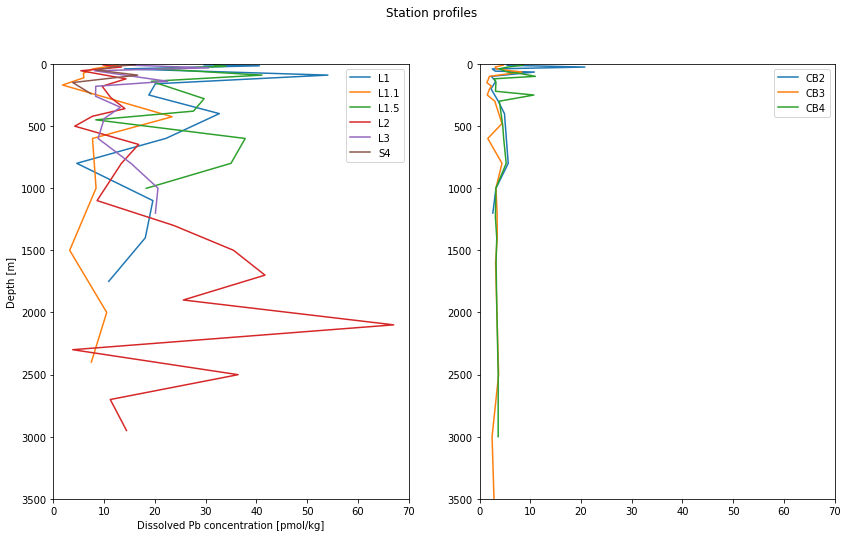

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,8))

ax1.plot(L1_Pb, L1_depth, '-', markersize=12, label=station_names[0])
ax1.plot(L11_Pb, L11_depth, '-', markersize=12, label=station_names[1])
ax1.plot(L15_Pb, L15_depth, '-', markersize=12, label=station_names[2])
ax1.plot(L2_Pb, L2_depth, '-', markersize=12, label=station_names[3])
ax1.plot(L3_Pb, L3_depth, '-', markersize=12, label=station_names[4])
ax1.plot(S4_Pb, S4_depth, '-', markersize=12, label=station_names[5])

ax2.plot(CB2_Pb, CB2_depth, '-', markersize=12, label='CB2')
ax2.plot(CB3_Pb, CB3_depth, '-', markersize=12, label='CB3')
ax2.plot(CB4_Pb, CB4_depth, '-', markersize=12, label='CB4')

ax1.set_xlim([0,70])
ax1.set_ylim([0,3500])
ax2.set_xlim([0,70])
ax2.set_ylim([0,3500])

fig.suptitle('Station profiles')
ax1.set_xlabel('Dissolved Pb concentration [pmol/kg]')
ax1.set_ylabel('Depth [m]')
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.legend()
ax2.legend()

I think I'll probably use Manuel's observations...

Boundary thickness is 20

In [10]:
boundary_lats = mesh_lat[2030:2050,240:799] 
boundary_lons = mesh_lon[2030:2050,240:799]
print(boundary_lats.shape)
print(boundary_lons.shape)

(20, 559)
(20, 559)


#### Create one vertical profile of dissolved Pb for the boundary condition:

In [11]:
# create one array of depths and Pb concentrations for stations at southern boundary:
Pb_total = np.concatenate((CB2_Pb, CB3_Pb, CB4_Pb))
depth_total = np.concatenate((CB2_depth, CB3_depth, CB4_depth))

In [12]:
Pb_total = np.append(Pb_total[0:-2],Pb_total[-1])
depth_total = np.append(depth_total[0:-2],depth_total[-1])

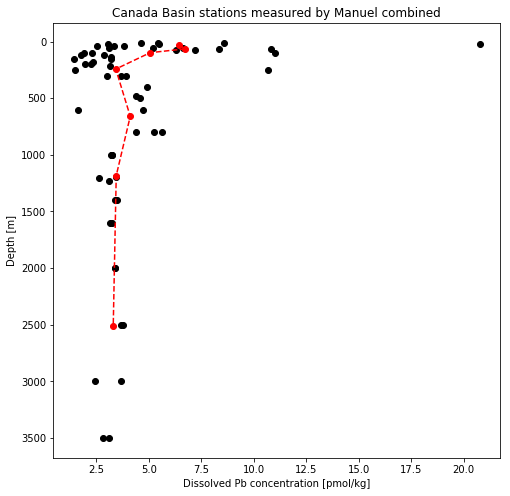

In [13]:
fig, ax1 = plt.subplots(figsize=(8,8))

x = Pb_total
y = depth_total
b = sorted((i,j) for i,j in zip(y,x))
x1, y1 = zip(*b)
plt.plot(y1, x1, '.k', markersize=12)
y_aves = [np.average(y1[0:10]), np.average(y1[10:15]), np.average(y1[15:20]), np.average(y1[20:35]),\
         np.average(y1[35:40]), np.average(y1[40:50]), np.average(y1[50:-1])]
x_aves = [np.average(x1[0:10]), np.average(x1[10:15]), np.average(x1[15:20]), np.average(x1[20:35]),\
         np.average(x1[35:40]), np.average(x1[40:50]), np.average(x1[50:-1])]
plt.plot(y_aves, x_aves,'.r', markersize=12)
plt.plot(y_aves, x_aves,'--r')

plt.title('Canada Basin stations measured by Manuel combined')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

Now interpolate to the model grid depths:

In [14]:
mesh = '/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12/ANHA12-EXH006_5d_gridT_y2002m01d05.nc'
m = nc.Dataset(mesh)
mdepth = m.variables['deptht']
mlons = m.variables['nav_lon']
mlats = m.variables['nav_lat']
mdepth = np.array(mdepth)
mlons = np.array(mlons)
mlats = np.array(mlats)

In [15]:
print('Original size: ' + str(len(y_aves)))
print('New size: ' + str(mdepth.shape))

Original size: 7
New size: (50,)


In [16]:
def interp_depths(var, mdepth, fill):
    # constant extrapolation for values outside of the range
    from scipy import interpolate
    
    interp_var = np.empty(mdepth.shape)
    x = x_aves

    y = var[:]
    f = interpolate.interp1d(x, y, fill_value = fill)
    interp_var[:] = f(mdepth)
    return interp_var

In [17]:
Pb_diss_int = interp_depths(y_aves, mdepth, fill='extrapolate')
Pb_diss_int = np.array(Pb_diss_int)

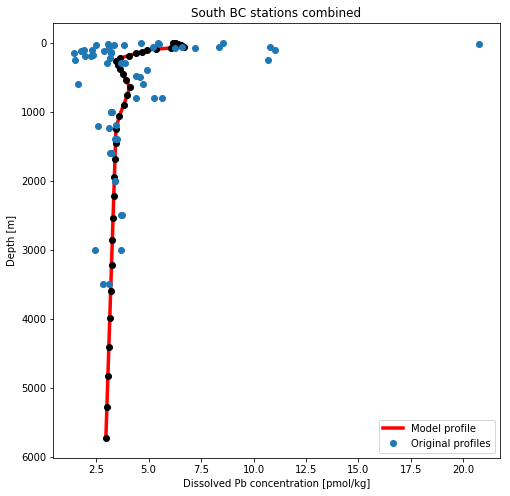

In [18]:
fig, ax1 = plt.subplots(figsize=(8,8))
plt.plot(Pb_diss_int, mdepth, '-r', linewidth=3.5, zorder=1, label = 'Model profile')
plt.plot(Pb_diss_int, mdepth, '.k', markersize=12, zorder=1)
plt.plot(y1, x1, '.', markersize=12, label='Original profiles')
plt.title('South BC stations combined')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend()

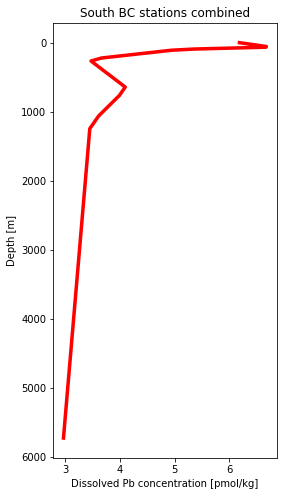

In [19]:
fig, ax1 = plt.subplots(figsize=(4,8))
plt.plot(Pb_diss_int, mdepth, '-r', linewidth=3.5, zorder=1, label = 'Model profile')
plt.title('South BC stations combined')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

In [29]:
Pb_diss_int

array([ 6.1825568 ,  6.1918686 ,  6.20168668,  6.21212296,  6.22331409,
        6.23542687,  6.24866482,  6.26327632,  6.27956436,  6.29789844,
        6.31872906,  6.34260524,  6.37019574,  6.40231466,  6.43995236,
        6.48431245,  6.5368563 ,  6.59935554,  6.6739549 ,  6.66541637,
        6.07405424,  5.36361814,  4.94226416,  4.70484554,  4.41925497,
        4.07594352,  3.66374525,  3.47194592,  3.55805653,  3.66069648,
        3.7825783 ,  3.92665675,  4.09607336,  3.99146851,  3.81420528,
        3.61004237,  3.44910619,  3.42690674,  3.40201779,  3.37438549,
        3.34400985,  3.31094468,  3.27529355,  3.23720203,  3.19684788,
        3.15442993,  3.11015755,  3.06424122,  3.01688463,  2.96827961])

Now I need to add this profile for every gridpoint on the boundary.

### Boundary condition:

In [20]:
print('Boundary latitudes shape: ', boundary_lats.shape)
print('Boundary longitudes shape: ',boundary_lons.shape)

Boundary latitudes shape:  (20, 559)
Boundary longitudes shape:  (20, 559)


In [21]:
print('final dimension should be 1D of length:', len(boundary_lats[0,:])*len(boundary_lats[:,0]))

final dimension should be 1D of length: 11180


Based on one layer:

In [22]:
dPb_BC = np.zeros((50,11180))
for i in range(0,11180):
    dPb_BC[:,i] = Pb_diss_int

In [23]:
dPb_BC.shape

(50, 11180)

In [24]:
dPb_NBC = np.reshape(dPb_BC, (1,50,1,11180))

## Create new NetCDF file

In [25]:
# Load structure from sample dataset:
BZ = mask.dimensions['z']

In [26]:
# Setup the new NetCDF file:
ncd = nc.Dataset('Pb_North_OBC_20181214.nc', 'w', zlib=True)
nc_tools.init_dataset_attrs(
    ncd,
    title='Pb Northern OBC',
    notebook_name='create_OBC',
    nc_filepath='./create_OBC.nc',
    comment='Northern boundary')

ncd.createDimension('x', len(boundary_lats[0,:])*len(boundary_lats[:,0]))
ncd.createDimension('y',1)
ncd.createDimension('z',len(BZ))
ncd.createDimension('t',None)

file format: NETCDF4
Conventions: CF-1.6
title: Pb Northern OBC
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/ccar-modeling/analysis-birgit/src/tip/notebooks/ANHA12/BC/create_OBC.ipynb
references: REQUIRED
history: [2018-12-18 11:03:07] Created netCDF4 zlib=True dataset.
comment: Northern boundary


<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 't', size = 0

In [27]:
dPb = ncd.createVariable('dPb', 'float64', ('t','z','y','x'))
dPb.units = 'dissolv. Pb'
dPb.long_name = 'dPb'
dPb[:] = dPb_NBC

In [28]:
nc_tools.check_dataset_attrs(ncd)
ncd.close()

Missing value for dataset attribute: references
